In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('cleaned_uk_police_crime_data.csv')
df['Month'] = pd.to_datetime(df['Month'])
print("Dataset Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
df.head()

Saving cleaned_uk_police_crime_data.csv to cleaned_uk_police_crime_data.csv
Dataset Shape: (37949, 11)

Missing values:
 Month              0
Reported by        0
Falls within       0
Longitude          0
Latitude           0
Location           0
LSOA code       1352
LSOA name       1352
Crime type         0
Month_Num          0
Year               0
dtype: int64


,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Month_Num,Year
0,2024-03-01,British Transport Police,British Transport Police,-0.272064,50.834327,On or near Shoreham-By-Sea (Station),E01031364,Adur 005C,Bicycle theft,3,2024
1,2024-03-01,British Transport Police,British Transport Police,-0.272064,50.834327,On or near Shoreham-By-Sea (Station),E01031364,Adur 005C,Public order,3,2024
2,2024-03-01,British Transport Police,British Transport Police,-0.272064,50.834327,On or near Shoreham-By-Sea (Station),E01031364,Adur 005C,Theft from the person,3,2024
3,2024-03-01,British Transport Police,British Transport Police,-0.272064,50.834327,On or near Shoreham-By-Sea (Station),E01031364,Adur 005C,Violence and sexual offences,3,2024
4,2024-03-01,British Transport Police,British Transport Police,-0.323071,50.826947,On or near Lancing (Station),E01031342,Adur 008B,Possession of weapons,3,2024


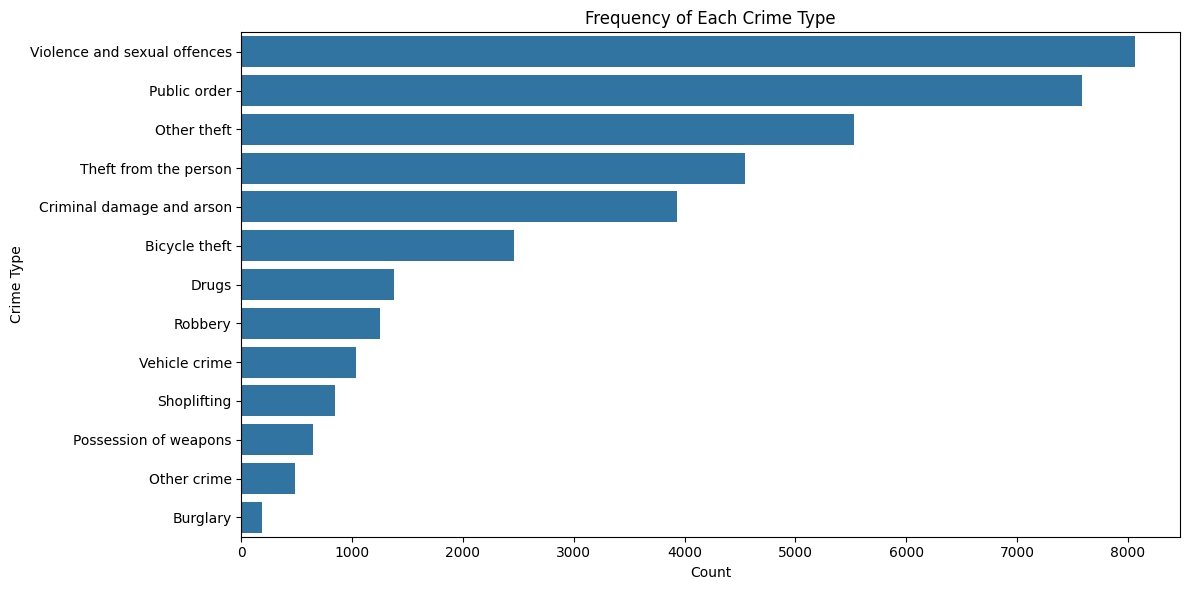

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.countplot(y='Crime type', data=df, order=df['Crime type'].value_counts().index)
plt.title('Frequency of Each Crime Type')
plt.xlabel('Count')
plt.ylabel('Crime Type')
plt.tight_layout()
plt.show()

In [19]:
!pip install plotly
import plotly.express as px
fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", hover_name="Crime type",
                        color="Crime type", zoom=5, height=700)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title="Crime Locations Map")
fig.show()

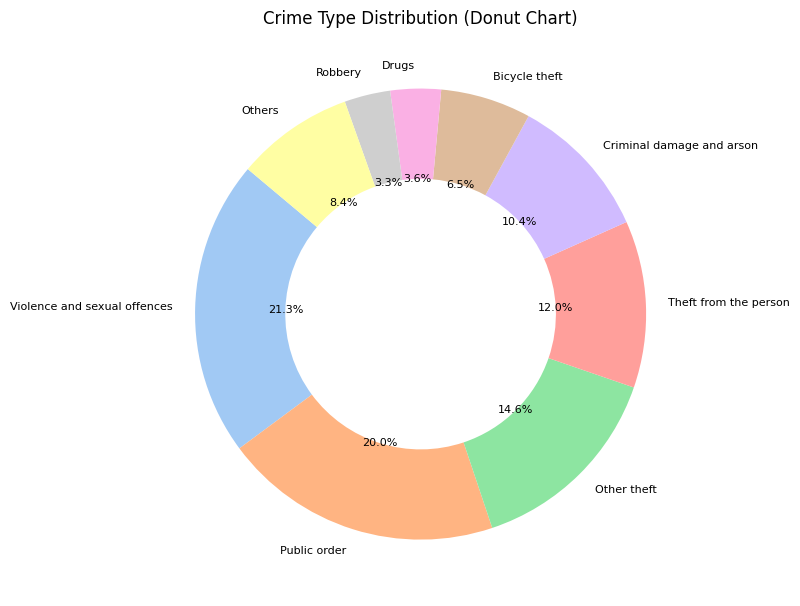

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
crime_counts = df['Crime type'].value_counts()
top_crimes = crime_counts[:8]
others = pd.Series([crime_counts[8:].sum()], index=['Others'])
crime_counts_clean = pd.concat([top_crimes, others])
plt.figure(figsize=(8,8))
colors = sns.color_palette('pastel', len(crime_counts_clean))
wedges, texts, autotexts = plt.pie(
    crime_counts_clean,
    labels=crime_counts_clean.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 8},
    wedgeprops=dict(width=0.4)
)
plt.title('Crime Type Distribution', fontsize=12)
plt.tight_layout()
plt.show()

✅ Classification Report:

                              precision    recall  f1-score   support

               Bicycle theft       0.07      0.09      0.08       474
                    Burglary       0.00      0.00      0.00        32
   Criminal damage and arson       0.14      0.13      0.13       750
                       Drugs       0.01      0.02      0.01       249
                 Other crime       0.01      0.04      0.01        79
                 Other theft       0.09      0.06      0.07      1065
       Possession of weapons       0.00      0.01      0.00       119
                Public order       0.16      0.09      0.12      1495
                     Robbery       0.03      0.06      0.04       279
                 Shoplifting       0.01      0.03      0.01       153
       Theft from the person       0.12      0.12      0.12       898
               Vehicle crime       0.02      0.04      0.03       212
Violence and sexual offences       0.16      0.08      0.11    

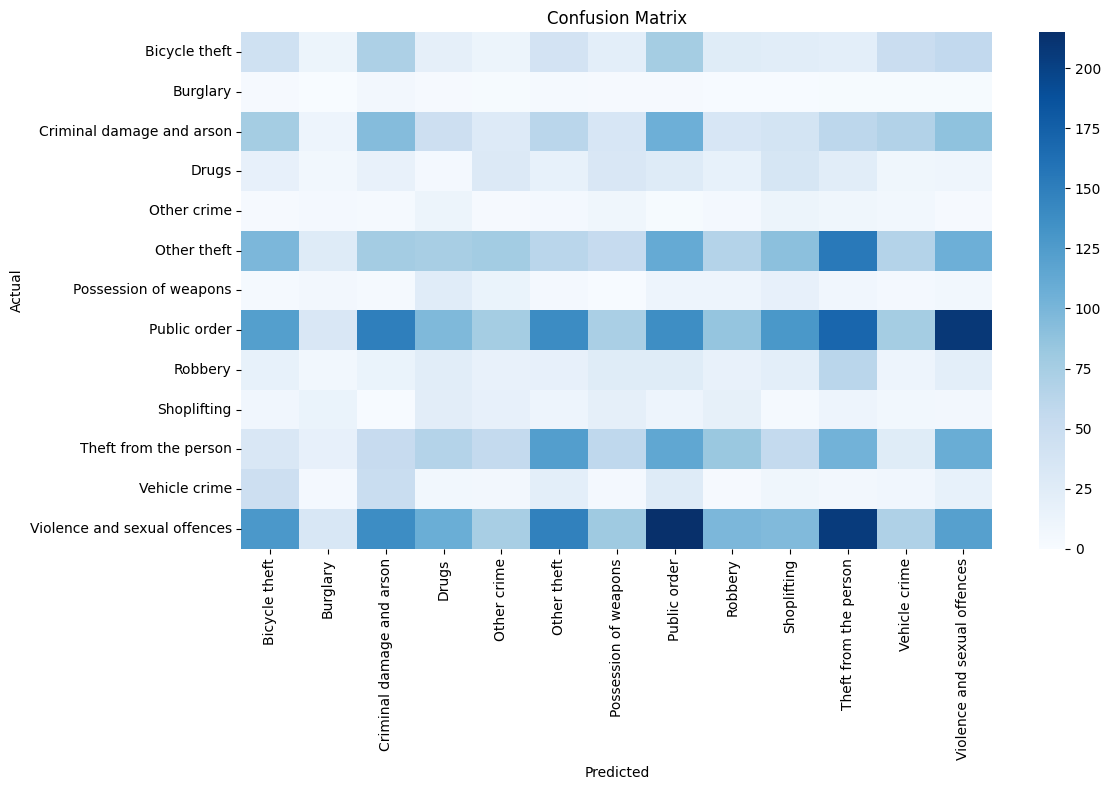

In [ ]:
df = pd.read_csv('cleaned_uk_police_crime_data.csv')
df['Month'] = pd.to_datetime(df['Month'])
df['Month_Num'] = df['Month'].dt.month
df = df.dropna(subset=['LSOA name']).copy()
le_lsoa = LabelEncoder()
df['LSOA_encoded'] = le_lsoa.fit_transform(df['LSOA name'])
le_crime = LabelEncoder()
df['Crime_encoded'] = le_crime.fit_transform(df['Crime type'])
X = df[['Month_Num', 'Latitude', 'Longitude', 'LSOA_encoded']]
y = df['Crime_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le_crime.classes_))
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=False, fmt='d',
            cmap='Blues', xticklabels=le_crime.classes_, yticklabels=le_crime.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

/tmp/ipython-input-16-883973080.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



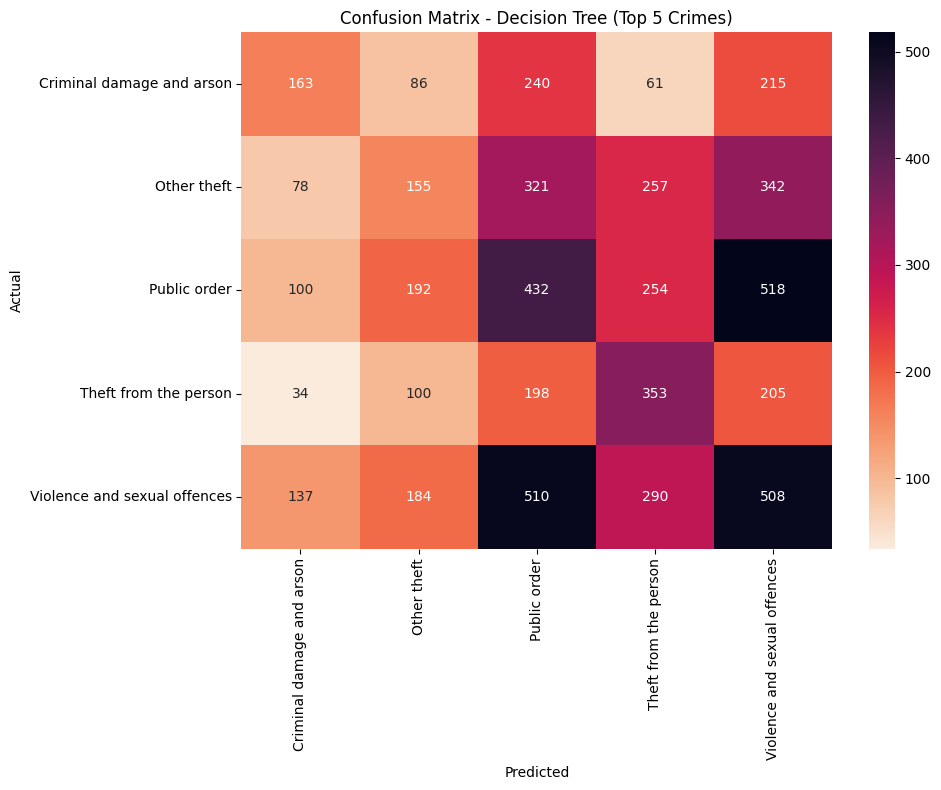

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

df = pd.read_csv("cleaned_uk_police_crime_data.csv")


top_crimes = df['Crime type'].value_counts().nlargest(5).index.tolist()
df_top = df[df['Crime type'].isin(top_crimes)]


le = LabelEncoder()
df_top['Crime type'] = le.fit_transform(df_top['Crime type'])


label_mapping = dict(zip(le.transform(le.classes_), le.classes_))


X = df_top[['Longitude', 'Latitude']]
y = df_top['Crime type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


cm = confusion_matrix(y_test, y_pred)


labels_sorted = [label_mapping[i] for i in sorted(label_mapping)]


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket_r',
            xticklabels=labels_sorted, yticklabels=labels_sorted)

plt.title('Confusion Matrix - Decision Tree (Top 5 Crimes)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=90, ha='center')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


/tmp/ipython-input-17-3710744456.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



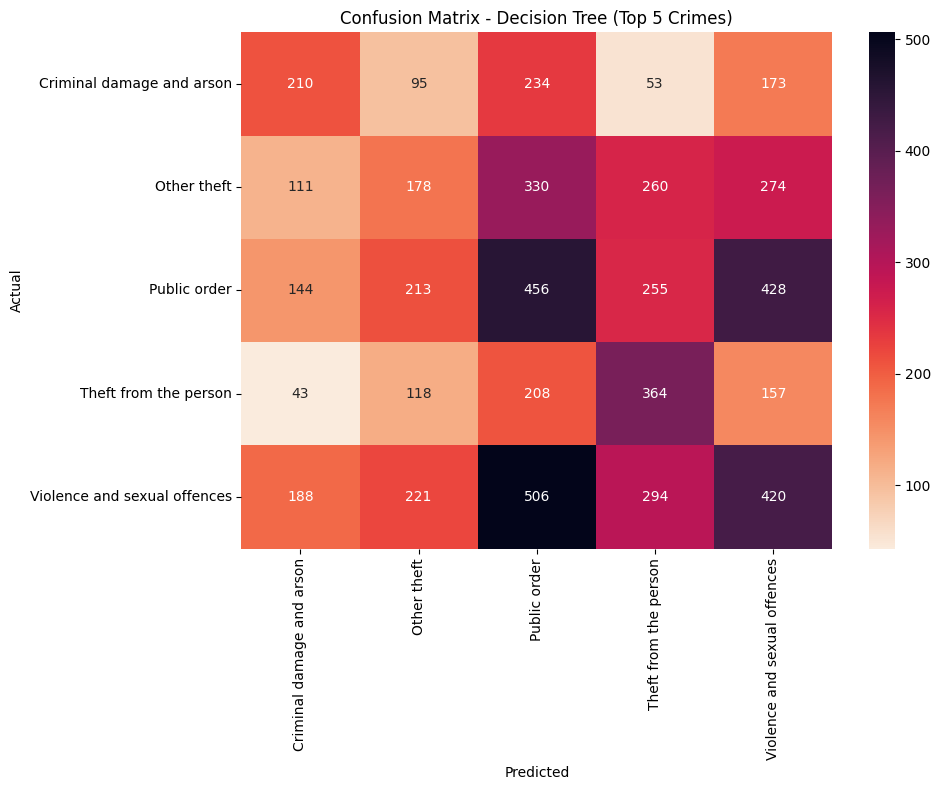

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
df = pd.read_csv("cleaned_uk_police_crime_data.csv")
top_crimes = df['Crime type'].value_counts().nlargest(5).index.tolist()
df_top = df[df['Crime type'].isin(top_crimes)]
le = LabelEncoder()
df_top['Crime type'] = le.fit_transform(df_top['Crime type'])
label_mapping = dict(zip(le.transform(le.classes_), le.classes_))
X = df_top[['Longitude', 'Latitude']]
y = df_top['Crime type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
labels_sorted = [label_mapping[i] for i in sorted(label_mapping)]
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket_r',
            xticklabels=labels_sorted, yticklabels=labels_sorted)
plt.title('Confusion Matrix - Decision Tree (Top 5 Crimes)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=90, ha='center')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("cleaned_uk_police_crime_data.csv")
df = df.dropna(subset=['Latitude', 'Longitude'])
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(df[['Latitude', 'Longitude']])
kmeans = KMeans(n_clusters=7, random_state=42, n_init=10)
df['Cluster_7'] = kmeans.fit_predict(coords_scaled)
sample_df = df.sample(n=3000, random_state=42)
fig = px.scatter_mapbox(
    sample_df,
    lat="Latitude",
    lon="Longitude",
    color="Cluster_7",
    zoom=5,
    height=700,
    title=" Crime Hotspot Clusters in the UK (KMeans, k=7)",
    mapbox_style="carto-positron",
    hover_data=["Crime type", "Location", "Month"]
)

fig.show()

Saving cleaned_uk_police_crime_data.csv to cleaned_uk_police_crime_data.csv


In [9]:

import pandas as pd
import plotly.express as px
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("cleaned_uk_police_crime_data.csv")
top5_crimes = df['Crime type'].value_counts().nlargest(5).index.tolist()
df_top5 = df[df['Crime type'].isin(top5_crimes)].copy()
df_top5.dropna(subset=['Longitude', 'Latitude'], inplace=True)
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(df_top5[['Longitude', 'Latitude']])
dbscan = DBSCAN(eps=0.15, min_samples=10)
df_top5['Cluster'] = dbscan.fit_predict(coords_scaled)
fig = px.scatter_mapbox(
    df_top5,
    lat='Latitude',
    lon='Longitude',
    color=df_top5['Cluster'].astype(str),
    zoom=5,
    height=600,
    title='Crime Hotspot Clusters using DBSCAN (Interactive Map)',
    mapbox_style='carto-positron'
)
fig.show()
